# Evaluating the integration of forcing files

## Importing

In [2]:
import xarray as xr
import numpy as np

## Loading datasets

In [3]:
ds = xr.open_dataset('/data/ibougoudis/MOAD/files/external_inputs.nc') # /home/sallen/MEOPAR/grid/weights-gem2.5-ops.nc
ds2 = xr.open_dataset('/data/ibougoudis/MOAD/files/external_inputs2.nc') # /home/sallen/MEOPAR/grid/weights-gem2.5-ops_201702.nc


In [3]:
ds

<xarray.Dataset> Size: 11GB
Dimensions:                       (time_counter: 1279, y: 898, x: 398)
Coordinates:
  * time_counter                  (time_counter) datetime64[ns] 10kB 2007-02-...
  * y                             (y) int64 7kB 0 1 2 3 4 ... 894 895 896 897
  * x                             (x) int64 3kB 0 1 2 3 4 ... 394 395 396 397
Data variables:
    Summation_of_solar_radiation  (time_counter, y, x) float64 4GB ...
    Mean_wind_speed               (time_counter, y, x) float64 4GB ...
    Mean_air_temperature          (time_counter, y, x) float64 4GB ...

## Comparing the different weight files for the operational forcing data

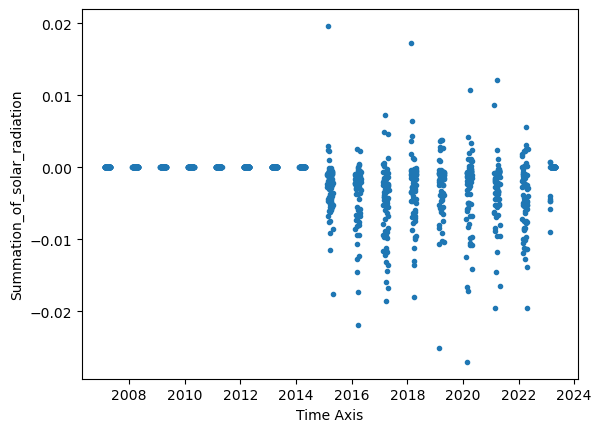

In [4]:
((ds.Summation_of_solar_radiation.mean(['y','x']) - ds2.Summation_of_solar_radiation.mean(['y','x'])) / ds.Summation_of_solar_radiation.mean(['y','x']) *100).plot(linestyle='', marker ='.')


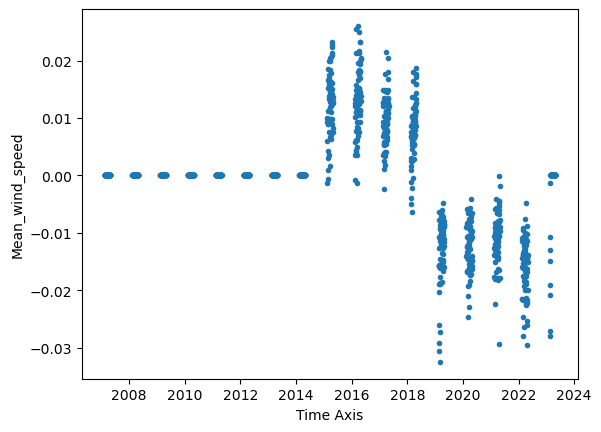

In [5]:
((ds.Mean_wind_speed.mean(['y','x']) - ds2.Mean_wind_speed.mean(['y','x'])) / ds.Mean_wind_speed.mean(['y','x']) *100).plot(linestyle='', marker ='.')


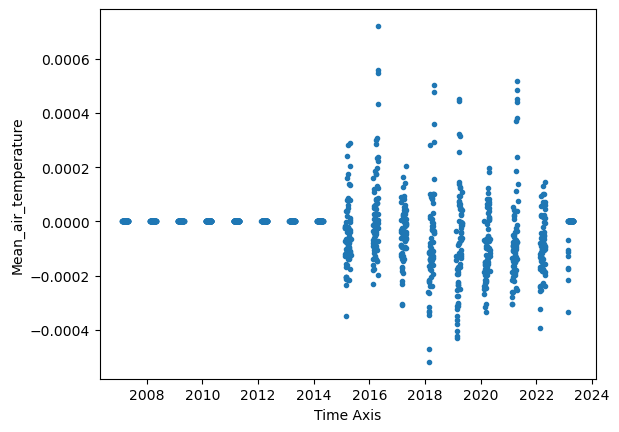

In [6]:
((ds.Mean_air_temperature.mean(['y','x']) - ds2.Mean_air_temperature.mean(['y','x'])) / ds.Mean_air_temperature.mean(['y','x']) *100).plot(linestyle='', marker ='.')


## Comparing actual gridded values to an external file

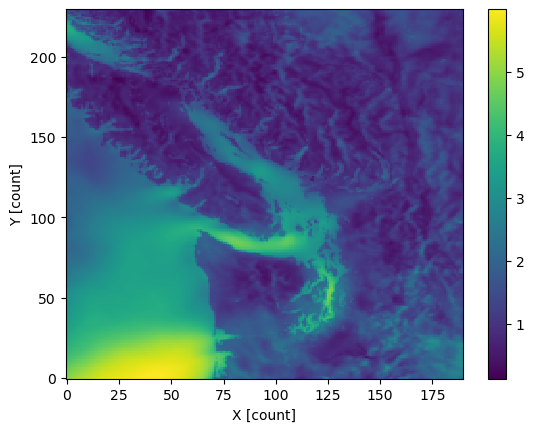

In [27]:
# External files
data = xr.open_dataset('/results/forcing/atmospheric/continental2.5/nemo_forcing/hrdps_y2023m03d16.nc')
weight = xr.open_dataset('/home/sallen/MEOPAR/grid/weights-continental2.5-hrdps_202108_23feb23onward.nc')

wind_external = np.sqrt(data.u_wind**2 + data.v_wind**2).mean('time_counter')
wind_external.plot()

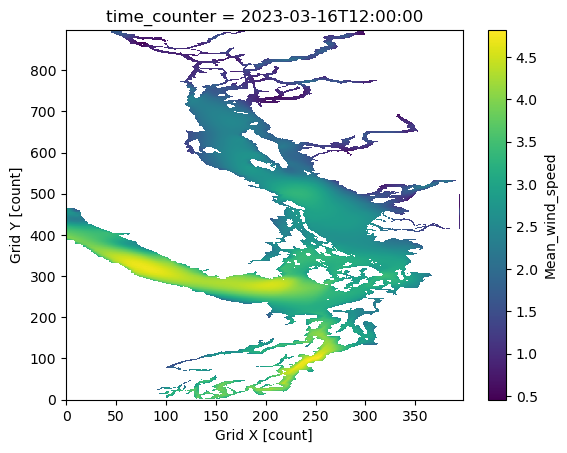

In [28]:
# Internal files
i = np.where(data.time_counter.dt.date[12]==ds.time_counter.dt.date)

ds['Mean_wind_speed'][i[0][0]].plot()